<a href="https://colab.research.google.com/github/Murcha1990/ML_AI24/blob/main/Hometasks/Pro/ML_AI24_HT7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание 7: Fraud Detection Competition**

Добро пожаловать на финальное домашнее задание курса! Домашнее задание направлено на систематизацию всех знаний, полученных в процессе учебы.

В нём Вы потренируетесь применять навыки построения пайплайнов машинного обучения, приобретенные в курсе от точки разведочного анализа данных до построения и валидации моделей машинного обучения.

## **Задача**
**Вы будете решать задачу определения фрода:**

https://www.kaggle.com/competitions/fraud-detection-24

**Вам нужно будет:**
- в jupyter notebook провести исследование данных;
- в нём же построить модели и оценить их качество;
- отправить посылку на Kaggle.

Более подробное описание шагов - в ноутбуке ниже.

## **Оценивание и баллы**
- В EDA и во всей работе будут оцениваться полнота и **выводы**;
- При обучении моделей старайтесь обоснованно подходить к их выбору, избегая простого перебора;

**Максимальный балл** - 10 (+ бонусы за Kaggle, см. ниже).


Мягкий дедлайн (окончание соревнования на Kaggle): **15 марта 23:59**


In [1]:
!pip install kaggle -q

# **Базовое решение и пример формирования файла под submission**


In [ ]:
!wget --no-check-certificate 'https://www.dropbox.com/s/5iuef7c9ljj84t6/train_transaction.csv?dl=0' -O train_transaction.csv
!wget --no-check-certificate 'https://www.dropbox.com/s/cmy01z5fw7ohlmd/train_identity.csv?dl=0' -O train_identity.csv
!wget --no-check-certificate 'https://www.dropbox.com/s/7thqkuxnwsa7njj/test_transaction.csv?dl=0' -O test_transaction.csv
!wget --no-check-certificate 'https://www.dropbox.com/s/b40nvbb9e2usd5w/test_identity.csv?dl=0' -O test_identity.csv
!wget --no-check-certificate 'https://www.dropbox.com/s/arkyoz0bel8z4d2/sample_submission.csv?dl=0' -O sample_submission.csv

--2025-02-20 09:39:55--  https://www.dropbox.com/s/5iuef7c9ljj84t6/train_transaction.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.2.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.2.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/puoen4suxjebjteenuwtm/train_transaction.csv?rlkey=madfflananln1b7qysdq8c54q&dl=0 [following]
--2025-02-20 09:39:55--  https://www.dropbox.com/scl/fi/puoen4suxjebjteenuwtm/train_transaction.csv?rlkey=madfflananln1b7qysdq8c54q&dl=0
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb34bc770794cbfc3590777eb02.dl.dropboxusercontent.com/cd/0/inline/Ckf_rXRWty1zhhvcJctQm6ev-sOkkxgfzZOjLDgKSGad5jmTaxn6XD89_j3tCEhdEAhOZxdCCsfdWu1RiEREDOZDskgIQnNtbSRQJVEqFGgkdayI_GUYYIPmrcOGkSbqlpW0AUlqa5kCzt07UP9QrX2z/file# [following]
--2025-02-20 09:39:56--  https://ucb34bc770794cbfc3590777eb

In [ ]:
!pip install catboost -q

In [2]:
from catboost import CatBoostClassifier
import pandas as pd
import os
from tqdm import tqdm
import gc
from tqdm import tqdm
INPUT_DIR = 'fraud-detection-24'

train_transaction = pd.read_csv(os.path.join(INPUT_DIR, 'train_transaction.csv'))
train_identity = pd.read_csv(os.path.join(INPUT_DIR, 'train_identity.csv'))
test_transaction = pd.read_csv(os.path.join(INPUT_DIR, 'test_transaction.csv'))
test_identity = pd.read_csv(os.path.join(INPUT_DIR, 'test_identity.csv'))
sample_submission = pd.read_csv(os.path.join(INPUT_DIR, 'sample_submission.csv'))

df_train = train_transaction.merge(train_identity, how='left', on='TransactionID')

df_test = test_transaction.merge(test_identity, how='left', on='TransactionID')

In [2]:
df_train.drop(['TransactionID', 'TransactionDT'], axis=1, inplace=True)
df_test.drop(['TransactionID', 'TransactionDT'], axis=1, inplace=True)
df_train.shape, df_test.shape

((417559, 432), (172981, 431))

In [3]:
object_cols = []
for idx, col in tqdm(enumerate(df_train.columns.drop('isFraud'))):
    if df_train[col].dtype == 'O':
      object_cols.append(idx)

431it [00:00, 24008.19it/s]


In [ ]:
X_train = df_train.drop('isFraud', axis=1)
X_train = X_train.fillna('')
y_train = df_train['isFraud'].values

cb = CatBoostClassifier(iterations=3)
cb.fit(X_train, y_train, object_cols, )

Learning rate set to 0.5
0:	learn: 0.2082395	total: 1.44s	remaining: 2.87s
1:	learn: 0.1360790	total: 2.54s	remaining: 1.27s
2:	learn: 0.1180984	total: 4.17s	remaining: 0us


In [ ]:
predictions = cb.predict_proba(df_test.fillna(''))

In [ ]:
sub = pd.DataFrame({'TransactionID': sample_submission['TransactionID'], 'isFraud': predictions[:, 0]})
sub.head()

,TransactionID,isFraud
0,3404559,0.978714
1,3404560,0.935724
2,3404561,0.946864
3,3404562,0.978714
4,3404563,0.970637


In [ ]:
# Сохранение submission
sub.to_csv('submission_baseline.csv', index=False)

### **Примечания:**

**1. Оценка качества и Submission File**
- Ответом является число от 0 до 1, метрикой качества - AUC-ROC.
- Структура Submission File:
 - для каждого значения *TransactionID* в тестовых данных вы должны предсказать **вероятность** для столбца *isFraud*.
 - в файле у вас должно быть две колонки: `TransactionID` и`isFraud`  **для каждой транзакции в датасете**.

**2. Объем данных**

Поскольку набор данных объемный, могут быть проблемы с переполнением памяти в Collab. Для решения проблемы можете использовать функцию из [этого ноутбука](https://colab.research.google.com/drive/18u75eyFGEoyeWJ_MbsLkcPa6gv2tNI8G#scrollTo=V2L1Nl5CTMMl), разобравшись, что она делает с данными.

# **Задание 1 (2 балла)**

Проведите EDA (разведочный анализ данных):
* проанализируйте признаки, их особенности и связь с целевой переменной
* проанализируйте целевую переменную
* оцените степень попарной взаимосвязи признаков, а также связи признаков и целевой переменной
* по результатам исследований сделайте необходимую обработку данных (удаление дублей, работа с пропусками, с категориальными столбцами (если они есть), работа с аномалиями, другие преобразования признаков)

Важно, что EDA всегда сопровождается выводами - не забудьте об этом.

In [16]:
# Взял из семинарского кода, не плагиат:)
import numpy as np
def reduce_mem_usage(df):
    NAlist = [] # Keeps track of columns that have missing values filled in.
    for col in tqdm(df.columns):
        if df[col].dtype != object:  # Exclude strings

            # make variables for Int, max and min
            IsInt = False
            col_max_value = df[col].max()
            col_min_value = df[col].min()

            # test if column can be converted to an integer
            col_as_int = df[col].fillna(0).astype(np.int64)
            diff = (df[col] - col_as_int)
            diff = diff.sum()
            if np.abs(diff) < 0.01:
                IsInt = True

            # Make Integer/unsigned Integer datatypes
            if IsInt:
                if col_min_value >= 0:
                    if col_max_value < 255:
                        df[col] = df[col].astype(np.uint8)
                    elif col_max_value < 65535:
                        df[col] = df[col].astype(np.uint16)
                    elif col_max_value < 4294967295:
                        df[col] = df[col].astype(np.uint32)
                    else:
                        df[col] = df[col].astype(np.uint64)
                else:
                    if col_min_value > np.iinfo(np.int8).min and col_max_value < np.iinfo(np.int8).max:
                        df[col] = df[col].astype(np.int8)
                    elif col_min_value > np.iinfo(np.int16).min and col_max_value < np.iinfo(np.int16).max:
                        df[col] = df[col].astype(np.int16)
                    elif col_min_value > np.iinfo(np.int32).min and col_max_value < np.iinfo(np.int32).max:
                        df[col] = df[col].astype(np.int32)
                    elif col_min_value > np.iinfo(np.int64).min and col_max_value < np.iinfo(np.int64).max:
                        df[col] = df[col].astype(np.int64)

            # Make float datatypes 32 bit
            else:
                df[col] = df[col].astype(np.float32)

    gc.collect()

    return df, NAlist

In [1]:
from catboost import CatBoostClassifier
import pandas as pd
import os
from tqdm import tqdm
import gc
from tqdm import tqdm
INPUT_DIR = 'fraud-detection-24'

train_transaction = pd.read_csv(os.path.join(INPUT_DIR, 'train_transaction.csv'))
train_identity = pd.read_csv(os.path.join(INPUT_DIR, 'train_identity.csv'))
test_transaction = pd.read_csv(os.path.join(INPUT_DIR, 'test_transaction.csv'))
test_identity = pd.read_csv(os.path.join(INPUT_DIR, 'test_identity.csv'))
sample_submission = pd.read_csv(os.path.join(INPUT_DIR, 'sample_submission.csv'))

df_train = train_transaction.merge(train_identity, how='left', on='TransactionID')

df_test = test_transaction.merge(test_identity, how='left', on='TransactionID')
df_train.drop(['TransactionID', 'TransactionDT'], axis=1, inplace=True)
df_test.drop(['TransactionID', 'TransactionDT'], axis=1, inplace=True)
df_train.shape, df_test.shape



((417559, 432), (172981, 431))

In [2]:
df_train.head()

,isFraud,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,0,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,59.0,W,4663,490.0,150.0,visa,166.0,debit,330.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,50.0,W,18132,567.0,150.0,mastercard,117.0,debit,476.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,50.0,H,4497,514.0,150.0,mastercard,102.0,credit,420.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


In [3]:
# Самое важное в любой задаче классификации - баланс классов)
# Давайте построим гистограмку распределения

import seaborn as sns
import matplotlib.pyplot as plt

target = 'isFraud'

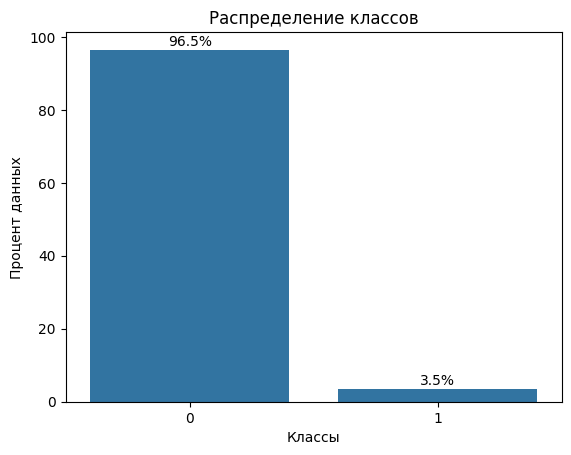

In [7]:

class_ratio = df_train[target].value_counts(normalize=True) * 100
sns.barplot(x=class_ratio.index, y=class_ratio.values)
plt.title("Распределение классов")
plt.ylabel("Процент данных")
plt.xlabel("Классы")

for i, value in enumerate(class_ratio.values):
    plt.text(i, value + 1, f"{value:.1f}%", ha='center')

plt.show()

Мда, очень серьезный дисбаланс классов. Буду учитывать это в обучении моделей (введу веса на минорный класс как учили на семинарах)

Next step - фильтрация данных. Удалим переменные, где больше 75% значений пропущено! 
А также заимпьютим колонки медианой(если численные) или спец строкой (если категориальные)

In [4]:
def remove_high_missing_columns(df, threshold=0.75):
    missing_ratio = df.isnull().mean()
    columns_to_keep = missing_ratio[missing_ratio <= threshold].index
    return df[columns_to_keep], columns_to_keep

df_train, cols = remove_high_missing_columns(df_train, threshold=0.75)
df_test = df_test[[col for col in cols if col != target]]

In [5]:
#sanity check
df_train.shape, df_test.shape

((417559, 308), (172981, 307))

In [6]:

from sklearn.impute import SimpleImputer

def impute_missing_values(train_data, test_data):
   

    train_data_imputed = train_data.copy()
    test_data_imputed = test_data.copy()
    numeric_columns = train_data_imputed.select_dtypes(include=['number']).columns.drop(target)
    if len(numeric_columns) > 0:
        numeric_imputer = SimpleImputer(strategy='median')
     
        numeric_imputer.fit(train_data_imputed[numeric_columns])
        train_data_imputed[numeric_columns] = numeric_imputer.transform(train_data_imputed[numeric_columns])
        test_data_imputed[numeric_columns] = numeric_imputer.transform(test_data_imputed[numeric_columns])
 
    categorical_columns = train_data_imputed.select_dtypes(include=['object', 'category']).columns
    if len(categorical_columns) > 0:
        categorical_imputer = SimpleImputer(strategy='constant', fill_value='unknown')
        categorical_imputer.fit(train_data_imputed[categorical_columns])
        train_data_imputed[categorical_columns] = categorical_imputer.transform(train_data_imputed[categorical_columns])
        test_data_imputed[categorical_columns] = categorical_imputer.transform(test_data_imputed[categorical_columns])
    
    return train_data_imputed, test_data_imputed



In [7]:
df_train, df_test = impute_missing_values(df_train, df_test)

In [8]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm

def handle_categorical_encoding(train_data, test_data, exclude_column='isFraud'):
    

    for column_name in tqdm(train_data.columns.difference([exclude_column])):
   
        if train_data[column_name].dtype == 'object':
            encoder = LabelEncoder()
            combined_data = train_data[column_name].tolist() + test_data[column_name].tolist()
            encoder.fit(combined_data)
            train_data[column_name] = encoder.transform(train_data[column_name])
            test_data[column_name] = encoder.transform(test_data[column_name])
            train_data[column_name] = train_data[column_name].astype('category')
            test_data[column_name] = test_data[column_name].astype('category')
    return train_data, test_data



In [9]:
df_train, df_test = handle_categorical_encoding(df_train, df_test, exclude_column='isFraud')

100%|██████████| 307/307 [00:10<00:00, 28.54it/s]


In [10]:
df_train

,isFraud,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,...,id_19,id_20,id_28,id_29,id_31,id_35,id_36,id_37,id_38,DeviceType
0,0,68.500,4,13926.0,361.0,150.0,1,142.0,1,315.0,...,341.0,469.0,2,2,129,2,2,2,2,2
1,0,29.000,4,2755.0,404.0,150.0,2,102.0,1,325.0,...,341.0,469.0,2,2,129,2,2,2,2,2
2,0,59.000,4,4663.0,490.0,150.0,4,166.0,2,330.0,...,341.0,469.0,2,2,129,2,2,2,2,2
3,0,50.000,4,18132.0,567.0,150.0,2,117.0,2,476.0,...,341.0,469.0,2,2,129,2,2,2,2,2
4,0,50.000,1,4497.0,514.0,150.0,2,102.0,1,420.0,...,542.0,144.0,1,1,123,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417554,0,335.000,4,2538.0,476.0,150.0,4,166.0,2,126.0,...,341.0,469.0,2,2,129,2,2,2,2,2
417555,0,160.500,4,6019.0,583.0,150.0,4,226.0,1,269.0,...,341.0,469.0,2,2,129,2,2,2,2,2
417556,0,230.079,0,5059.0,138.0,200.0,4,226.0,2,299.0,...,266.0,315.0,0,0,54,0,0,1,0,1
417557,0,105.000,4,6697.0,111.0,150.0,4,195.0,2,299.0,...,341.0,469.0,2,2,129,2,2,2,2,2


In [11]:
len(df_train.columns) == len(df_test.columns) + 1

True

c:\Users\User\miniconda3\lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\User\miniconda3\lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


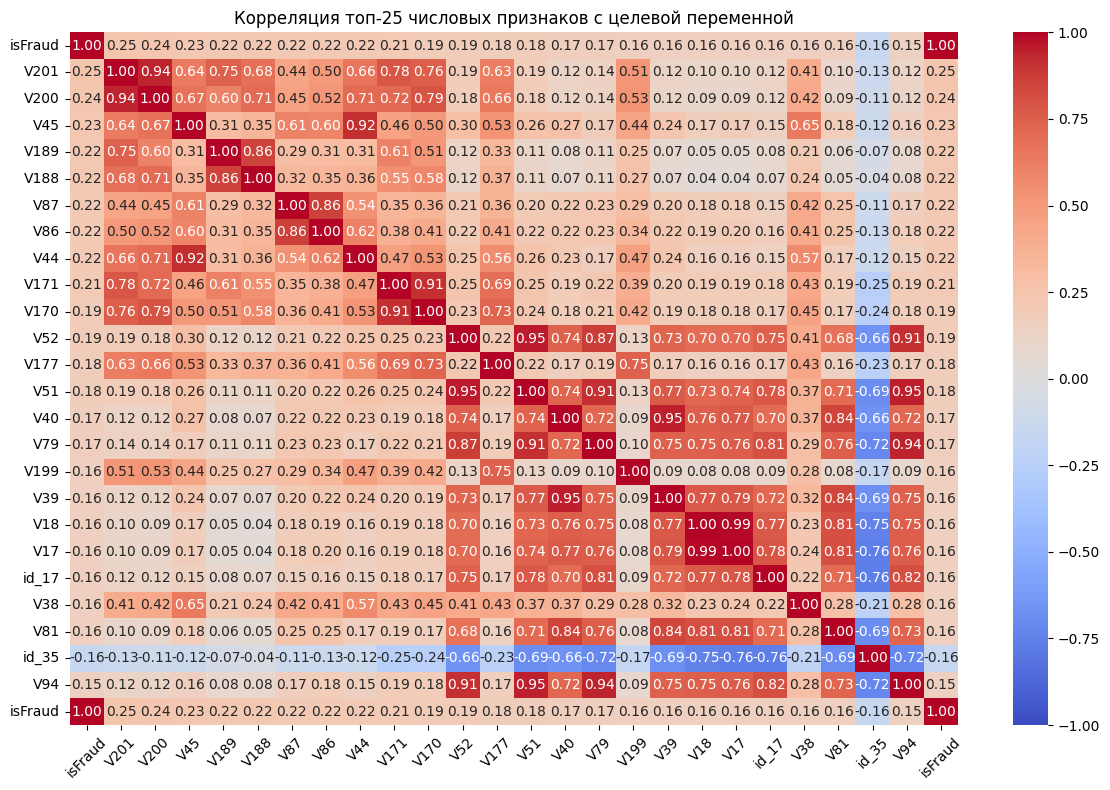

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_top_correlations_with_target(train_data, target_column, num_features=20):
    correlation_with_target = train_data.corrwith(train_data[target_column]).abs()
    top_features = correlation_with_target.sort_values(ascending=False).head(num_features).index.tolist()
    features_to_plot = top_features + [target_column]
    
    plt.figure(figsize=(12, 8))
    sns.heatmap(
        train_data[features_to_plot].corr(),
        annot=True,
        cmap="coolwarm",
        fmt=".2f",
        vmin=-1, vmax=1
    )
    plt.title(f"Корреляция топ-{num_features} числовых признаков с целевой переменной")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

plot_top_correlations_with_target(df_train, target_column='isFraud', num_features=25)

In [12]:
gc.collect()

0

In [13]:
# Sanity check
df_train.isna().sum().sum() == df_test.isna().sum().sum() == 0

True

In [17]:
import numpy as np
X_train = df_train.drop(columns=[target])
y_train = df_train[target]
X_test = df_test
X_train = X_train.astype(np.float64)
X_train, _ = reduce_mem_usage(X_train)
X_test = X_test.astype(np.float64)
X_test, _ = reduce_mem_usage(X_test)

100%|██████████| 307/307 [00:00<00:00, 358.77it/s]


In [18]:
# для уменьшения размерности а вдруг)
from sklearn.decomposition import PCA
pca = PCA(n_components=100, svd_solver='full')
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

Выводы:

* проанализируйте признаки, их особенности и связь с целевой переменной:
    Всего более 400 признаков. Из них у четверти более 75% данных пропущено. 
    В среднем топ-20 по корреляции колеблется от в среднем 0.16 до 0.25, но есть несколько кусков большой корреляции что не очень круто) Но посмотрим что будет на модельках(име все равно тк мы будем ансамбли обучать:)))

* проанализируйте целевую переменную:
    Огромный дисбаланс, 3.5% vs 96.5%, надо будет учитывать при обучении моделей 
* оцените степень попарной взаимосвязи признаков:
    -Ситуация не критичная, мало больших корреляций между признаками + мы все равно бустинги обучать будем где это не роляет))
    - Корреляция с таргетом у топ-25 фичей небольшая положительная, что тоже не оч круто если бы мы юзали линейные модели но в целом пофигу тк мы юзаем бустинги)

* по результатам исследований сделайте необходимую обработку данных:
    - Удалил признаки с большим кол-вом пропускоы
    - Заимпьютил пропуски и заменил их медианой(численные) и 'unknown' (категориальные) прямо как в семинарском коде!
    

# **Задание 2 (3 балла)**

Обучите несколько ML-моделей для решения поставленной задачи.
Оцените их качество двумя способами:

1) на кросс-валидации

2) на лидерборде

Подберите число фолдов на кросс-валидации так, чтобы метрики, которые вы видите, были максимально близки на кросс-валидации и на лидерборде.

По результатам экспериментов постройте таблицу:
* в каждой строке таблицы - результаты одной модели
* по столбцам: качество на кросс-валидации, качество на лидерборде, модель с гиперпараметрами
Полученную таблицу вставьте картинкой прямо в ноутбук после ячеек с кодом. Сделайте текстовые выводы.

Какие модели буду обучать:
- логрег на всех данных (бейзлайн)
- логрег на PCA данных
- Катбуст На всех/PCA данных
- Случайный лес На всех/PCA данных

Там где можно буду также тюнить параметры:)

In [24]:
#logreg full
from catboost import CatBoostClassifier, Pool, cv
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import pandas as pd


param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],  
}
logreg_tuner = GridSearchCV(
    estimator=LogisticRegression(class_weight='balanced'),
    param_grid=param_grid,
    scoring='roc_auc',
    cv=3,
    n_jobs=-1, 
    verbose=1
)

logreg_tuner.fit(X_train, y_train)
print(f"Best parameters: {logreg_tuner.best_params_}")
print(f"Best CV AUC: {logreg_tuner.best_score_:.4f}")

best_logreg = LogisticRegression(**logreg_tuner.best_params_, class_weight='balanced')
best_logreg.fit(X_train, y_train)
test_probs = best_logreg.predict_proba(X_test)[:, 1]

submission = pd.DataFrame({
    'TransactionID': sample_submission.TransactionID,
    'isFraud': test_probs
})

submission_path = 'logreg_tuned_v1.csv'
submission.to_csv(submission_path, index=False)
print(f"Submission saved to {submission_path}")

Fitting 3 folds for each of 12 candidates, totalling 36 fits


c:\Users\User\miniconda3\lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Best parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Best CV AUC: 0.8315
Submission saved to logreg_tuned_v1.csv


In [ ]:
# тк логрег у меня обучался 10005000 лет с тюном, буду использовать
#  те же параметры для PCA версииbest_logreg = LogisticRegression(**logreg_tuner.best_params_, class_weight='balanced')

best_logreg_pca = LogisticRegression(best_logreg.get_params, class_weight='balanced')
best_logreg.fit(X_train_pca, y_train)
_probs = best_logreg.predict_proba(X_train_pca)[:, 1]
print(f"Best parameters: {best_logreg.get_params}")
print(f"Best CV AUC: {roc_auc_score(y_train, _probs):.4f}")
test_probs = best_logreg.predict_proba(X_test_pca)[:, 1]

submission = pd.DataFrame({
    'TransactionID': sample_submission.TransactionID,
    'isFraud': test_probs
})

submission_path = 'logreg_tuned_v2.csv'
submission.to_csv(submission_path, index=False)
print(f"Submission saved to {submission_path}")

Best parameters: <bound method BaseEstimator.get_params of LogisticRegression(C=0.1, class_weight='balanced', penalty='l1',
                   solver='liblinear')>
Best CV AUC: 0.8358
Submission saved to logreg_tuned_v2.csv


In [ ]:
#catboost
from sklearn.model_selection import GridSearchCV


model = CatBoostClassifier(
    iterations=1000,
    eval_metric='AUC',
    verbose=500,  
    random_seed=42
)


param_grid = {
    'depth': [4, 6, 8],
    'learning_rate': [0.1, 0.05, 0.01],
}


grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=3,
    scoring='roc_auc',
    n_jobs=-1, 
    verbose=3  
)


grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_index = grid_search.best_index_
best_mean = grid_search.best_score_
best_std = grid_search.cv_results_['std_test_score'][best_index]

print(f"Best Parameters: {best_params}")
print(f"Best CV ROC AUC: {best_mean:.4f} (±{best_std:.4f})")
model.fit(X_train, y_train)
sub = pd.DataFrame({'TransactionID': sample_submission['TransactionID'], 'isFraud': model.predict_proba(X_test)[:, 1]})
sub.to_csv('catboost_v2.csv', index=False)

0:	total: 236ms	remaining: 3m 56s
250:	total: 17s	remaining: 50.6s
500:	total: 34s	remaining: 33.9s
750:	total: 52.2s	remaining: 17.3s
999:	total: 1m 9s	remaining: 0us
0:	total: 71.1ms	remaining: 1m 11s
250:	total: 17s	remaining: 50.6s
500:	total: 34.6s	remaining: 34.4s
750:	total: 52.7s	remaining: 17.5s
999:	total: 1m 11s	remaining: 0us
0:	total: 69.2ms	remaining: 1m 9s
250:	total: 18.8s	remaining: 56.1s
500:	total: 37.4s	remaining: 37.3s
750:	total: 55.8s	remaining: 18.5s
999:	total: 1m 15s	remaining: 0us
0:	total: 77.2ms	remaining: 1m 17s
250:	total: 18.5s	remaining: 55.1s
500:	total: 36.3s	remaining: 36.2s
750:	total: 54.4s	remaining: 18s
999:	total: 1m 11s	remaining: 0us
0:	total: 80.4ms	remaining: 1m 20s
250:	total: 18.6s	remaining: 55.4s
500:	total: 36.3s	remaining: 36.1s
750:	total: 54s	remaining: 17.9s
999:	total: 1m 12s	remaining: 0us
CV ROC AUC: 0.9059 (±0.0086)
0:	total: 78.9ms	remaining: 1m 18s
250:	total: 21.9s	remaining: 1m 5s
500:	total: 43.6s	remaining: 43.5s
750:	tota

In [ ]:
from sklearn.model_selection import GridSearchCV


model = CatBoostClassifier(
    iterations=1000,
    eval_metric='AUC',
    verbose=500,  
    random_seed=42
)


param_grid = {
    'depth': [4, 6, 8],
    'learning_rate': [0.1, 0.05, 0.01],
}


grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=3,
    scoring='roc_auc',
    n_jobs=-1, 
    verbose=3  
)


grid_search.fit(X_train_pca, y_train)
best_params = grid_search.best_params_
best_index = grid_search.best_index_
best_mean = grid_search.best_score_
best_std = grid_search.cv_results_['std_test_score'][best_index]

print(f"Best Parameters: {best_params}")
print(f"Best CV ROC AUC: {best_mean:.4f} (±{best_std:.4f})")
model.fit(X_train_pca, y_train)
sub = pd.DataFrame({'TransactionID': sample_submission['TransactionID'], 'isFraud': model.predict_proba(X_test_pca)[:, 1]})
sub.to_csv('catboost_v2.csv', index=False)

0:	total: 46.3ms	remaining: 46.3s
250:	total: 10.9s	remaining: 32.4s
500:	total: 21.9s	remaining: 21.8s
750:	total: 32.7s	remaining: 10.8s
999:	total: 43.7s	remaining: 0us
0:	total: 48.1ms	remaining: 48.1s
250:	total: 11.1s	remaining: 33s
500:	total: 21.7s	remaining: 21.6s
750:	total: 32.9s	remaining: 10.9s
999:	total: 44.3s	remaining: 0us
0:	total: 39.1ms	remaining: 39.1s
250:	total: 10.6s	remaining: 31.6s
500:	total: 20.9s	remaining: 20.8s
750:	total: 31.3s	remaining: 10.4s
999:	total: 42s	remaining: 0us
CV ROC AUC: 0.8643 (±0.0039)
0:	total: 54.2ms	remaining: 54.2s
250:	total: 14.9s	remaining: 44.6s
500:	total: 30.8s	remaining: 30.7s
750:	total: 46.8s	remaining: 15.5s
999:	total: 1m 2s	remaining: 0us


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd


param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'max_features': ['sqrt', 'log2']
}


rf_tuner = GridSearchCV(
    estimator=RandomForestClassifier(
        class_weight='balanced',
        random_state=42,
        n_jobs=-1  
    ),
    param_grid=param_grid,
    scoring='roc_auc',
    cv=3,
    n_jobs=-1,  
    verbose=1
)

rf_tuner.fit(X_train, y_train)

print(f"Best parameters: {rf_tuner.best_params_}")
print(f"Best CV AUC: {rf_tuner.best_score_:.4f}")


best_rf = RandomForestClassifier(
    **rf_tuner.best_params_,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)
best_rf.fit(X_train, y_train)


test_probs = best_rf.predict_proba(X_test)[:, 1] 
submission = pd.DataFrame({
    'TransactionID': sample_submission.TransactionID,
    'isFraud': test_probs
})
submission_path = 'rf_tuned_v1.csv'
submission.to_csv(submission_path, index=False)
print(f"Submission saved to {submission_path}")

Best parameters: <bound method BaseEstimator.get_params of RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=42)>
Best CV AUC: 0.9999993038995014
Submission saved to rf_tuned_v1.csv


In [ ]:
print(f"Best parameters: {rf_tuner.best_params_}")
print(f"Best CV AUC: {rf_tuner.best_score_:.4f}")


best_rf = RandomForestClassifier(
    **rf_tuner.best_params_,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)
best_rf.fit(X_train_pca, y_train)


test_probs = best_rf.predict_proba(X_test_pca)[:, 1] 
submission = pd.DataFrame({
    'TransactionID': sample_submission.TransactionID,
    'isFraud': test_probs
})
submission_path = 'rf_tuned_v2.csv'
submission.to_csv(submission_path, index=False)
print(f"Submission saved to {submission_path}")

Best parameters: <bound method BaseEstimator.get_params of RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=42)>
Best CV AUC: 0.9999990806347098
Submission saved to rf_tuned_v2.csv


| Метод            | Скор на лидерборде | Скор Локально после Кросс-валидации     |
| ---------------- | ------------------ | ------------------|
| Logreg Full      | 0.8395             |      0.8315             |
| Logreg PCA        | 0.83079              |      0.8358             |
| CatBoost Full   | 0.9059             |          0.90097         |
| CatBoost PCA | 0.8643             |       0.886            |
| RF Full | 0.999            |        0.891           |
| RF PCA | 0.999            |         0.86375          |


Вывод - Лучше всего себя показал катбуст тк из-за его строения он в целом и без тюна показывает обычно хорошие цифры) А тут я аж гридсерч применил и совсем хорошо стало)

Странно себя повел Случайный Лес) Он точно переобучился, но у меня нет времени разбираться почему)

# **Задание 3 (2 балла)**

Попробуйте подойти к задаче как к поиску аномалий.

1) Поищите аномалии (фрод) различными рассмотренными в курсе методами и сделайте прогноз на тестовых данных.

Результатом также будет таблица:
* по строкам - методы поиска аномалий
* по столбцам - качество вашего решения на leaderboard

2) Попробуйте встроить поиск аномалий и их удаление в ML-пайплайн: найдите аномалии и что-нибудь с ними сделайте до обучения моделей (можно удалить их, а можно использовать в качестве дополнительных признаков - попробуйте разные стратегии). Результат проверьте на кросс-валидации и на лидерборде, сделайте выводы.

Тут я буду применять все методы которые мы проходили на семах и буду переиспользовать часть кода оттуда же)

In [46]:
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.covariance import EllipticEnvelope
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest
from sklearn.pipeline import Pipeline
from tqdm import tqdm
import joblib

class AnomalyTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, z_cutoff=3):
        self.z_cutoff = z_cutoff
        self.bounds = {}
        self.dist_model = EllipticEnvelope()
        self.svm_model = OneClassSVM(nu=0.05)
        self.forest_model = IsolationForest()
        self.means = None
        self.stds = None

    def fit(self, data, target=None):
        for col in tqdm(data.columns, desc="Fitting"):
            q1 = data[col].quantile(0.25)
            q3 = data[col].quantile(0.75)
            iqr = q3 - q1
            self.bounds[col] = (q1 - 1.5*iqr, q3 + 1.5*iqr)
        
        self.means = data.mean()
        self.stds = data.std()
        
        self.svm_model.fit(data)
        self.forest_model.fit(data)
        
        return self

    def transform(self, data):
        data = data.copy()
        box_flags = pd.DataFrame()
        
        for col in tqdm(data.columns, desc="Transforming"):
            low, high = self.bounds[col]
            box_flags[col] = (data[col] < low) | (data[col] > high)
        
        z_scores = (data - self.means) / self.stds
        z_flags = (np.abs(z_scores) > self.z_cutoff).any(axis=1).astype(int)
        svm_flags = (self.svm_model.predict(data) == -1).astype(int)
        forest_flags = (self.forest_model.predict(data) == -1).astype(int)
        
        data['box_anomaly'] = box_flags.any(axis=1).astype(int)
        data['z_anomaly'] = z_flags
        data['svm_anomaly'] = svm_flags
        data['forest_anomaly'] = forest_flags
        
        return data

pipeline = Pipeline([('anomaly', AnomalyTransformer())])
transformed_data = pipeline.fit_transform(X_train)
transformed_data.to_csv("enhanced_data.csv", index=False)

joblib.dump(pipeline, 'trained_pipeline.joblib')

Transforming:  22%|██▏       | 69/307 [00:00<00:00, 684.99it/s]C:\Users\User\AppData\Local\Temp\ipykernel_19096\1646803024.py:42: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  box_flags[col] = (data[col] < low) | (data[col] > high)
C:\Users\User\AppData\Local\Temp\ipykernel_19096\1646803024.py:42: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  box_flags[col] = (data[col] < low) | (data[col] > high)
C:\Users\User\AppData\Local\Temp\ipykernel_19096\1646803024.py:42: PerformanceWarning: DataFrame is highly fragmented.  This is usual

['trained_pipeline.joblib']

In [47]:
X_test_enhanced = pipeline.transform(X_test)
X_test_enhanced.to_csv("enhanced_data_test.csv")

Transforming:   0%|          | 0/307 [00:00<?, ?it/s]C:\Users\User\AppData\Local\Temp\ipykernel_19096\1646803024.py:42: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  box_flags[col] = (data[col] < low) | (data[col] > high)
C:\Users\User\AppData\Local\Temp\ipykernel_19096\1646803024.py:42: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  box_flags[col] = (data[col] < low) | (data[col] > high)
C:\Users\User\AppData\Local\Temp\ipykernel_19096\1646803024.py:42: PerformanceWarning: DataFrame is highly fragmented.  This is usually the res

In [48]:
print(f"Box Plot: {roc_auc_score(y_train, transformed_data['box_anomaly']):.4f}")
print(f"Z Score: {roc_auc_score(y_train, transformed_data['z_anomaly']):.4f}")
print(f"SVM: {roc_auc_score(y_train, transformed_data['svm_anomaly']):.4f}")
print(f"Forest: {roc_auc_score(y_train, transformed_data['forest_anomaly']):.4f}")


Box Plot: 0.5110
Z Score: 0.6337
SVM: 0.5372
Forest: 0.5813


In [49]:
sub = pd.DataFrame({'TransactionID': sample_submission['TransactionID'], 'isFraud': X_test_enhanced['box_anomaly']})
sub.to_csv('box.csv', index=False)
sub = pd.DataFrame({'TransactionID': sample_submission['TransactionID'], 'isFraud': X_test_enhanced['z_anomaly']})
sub.to_csv('z_anomaly.csv', index=False)
sub = pd.DataFrame({'TransactionID': sample_submission['TransactionID'], 'isFraud': X_test_enhanced['svm_anomaly']})
sub.to_csv('svm_anomaly.csv', index=False)
sub = pd.DataFrame({'TransactionID': sample_submission['TransactionID'], 'isFraud': X_test_enhanced['forest_anomaly']})
sub.to_csv('forest_anomaly.csv', index=False)

In [ ]:
# Самый простой вариант - добавить предсказания модельки в качестве признака!
catboost_with_anomaly = CatBoostClassifier(iterations=1000,depth=6,learning_rate=0.1,eval_metric='AUC', verbose=500,random_seed=228_322)
cv_scores = cross_val_score(estimator=catboost_with_anomaly, X=transformed_data, y=y_train, cv=5, scoring='roc_auc')
print(f"CV ROC AUC: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")

0:	total: 90.4ms	remaining: 1m 30s
500:	total: 34.5s	remaining: 34.4s
999:	total: 1m 9s	remaining: 0us
0:	total: 62.6ms	remaining: 1m 2s
500:	total: 34.8s	remaining: 34.7s
999:	total: 1m 9s	remaining: 0us
0:	total: 56.1ms	remaining: 56.1s
500:	total: 34.9s	remaining: 34.7s
999:	total: 1m 9s	remaining: 0us
0:	total: 67.3ms	remaining: 1m 7s
500:	total: 35.6s	remaining: 35.5s
999:	total: 1m 10s	remaining: 0us
0:	total: 65.5ms	remaining: 1m 5s
500:	total: 35.4s	remaining: 35.2s
999:	total: 1m 10s	remaining: 0us
CV ROC AUC: 0.9047 (±0.0093)


In [51]:
catboost_with_anomaly.fit(transformed_data, y_train)
sub = pd.DataFrame({'TransactionID': sample_submission['TransactionID'], 'isFraud': catboost_with_anomaly.predict_proba(X_test_enhanced)[:, 1]})
sub.to_csv('catboost_Anomaly.csv', index=False)

0:	total: 88.6ms	remaining: 1m 28s
500:	total: 42.2s	remaining: 42.1s
999:	total: 1m 24s	remaining: 0us


| Метод            | Скор на лидерборде | Скор Локально      |
| ---------------- | ------------------ | ------------------|
| Box plot         | 0.50385              |      0.5110     |
| Z_score          | 0.600              |       0.6337    |
| One-class SVM    | 0.5415              |        0.5372   |
| Isolation Forest | 0.613              |     0.5813|     
| Catboost Anomaly | 0.899              |      0.9047|     

Выводы:
- Простые методы поиска аномалий которые мы рассмотрели на курсе не дали хороших результатов. Я не тюнил модели которые можно тюнить но все 4 подхода едва ли лучше random-guessа.
- При добавлении их в качестве факторов к моделькам - результат сравним с предыдушими но даженемного хуже. Я думаю что можно было бы потюнить (если у кого-то есть лишних  5 машино-человеко-часов) изоляционный лес и свм и возможно предикторы были бы получше.. Но у меня такой роскоши нет поэтому имеем что имеем)

# **Задание 4 (1 балл)**

Сделайте кластеризацию различными способами. Результаты кластеризации используйте для улучшения ML-решений:

1) Номера кластеров закодируйте (OHE или target-encoding) и добавьте как новые признаки

2) При использовании DBSCAN / HDBSCAN предсказанный шум можно трактовать как найденную аномалию и также добавить ее как новый признак

Проведите различные эксперименты. Проверьте как эти подходы влияют на качество прогнозов по кросс-валидации и на лидерборде, сделайте выводы.

In [52]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
# У меня слишком слабый комп чтобы кластеризовать по 307 фичас сорри
pca = PCA(n_components=20) # просто из головы взял)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
# Юзаем к-means в качестве самого простого варианта. 
kmeans = KMeans(n_clusters=20) # просто из головы взял)
clusters_kmeans = kmeans.fit(X_train_pca)
clusters_kmeans_test = kmeans.predict(X_test_pca)

In [ ]:
# Закодируем кластера
X_test["cluster"] = clusters_kmeans_test
X_train["cluster"] = clusters_kmeans.labels_

C:\Users\User\AppData\Local\Temp\ipykernel_19096\4065909711.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_train["cluster"] = clusters_kmeans.labels_
C:\Users\User\AppData\Local\Temp\ipykernel_19096\4065909711.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test["cluster"] = clusters_kmeans_test


In [ ]:
# %pip install category_encoders
from category_encoders import TargetEncoder

encoder = TargetEncoder(cols=["cluster"])
X_train["cluster"] = encoder.fit_transform(X_train["cluster"],  y_train)
X_test["cluster"] = encoder.transform(X_test["cluster"])

In [57]:
clustered_data_boosting = CatBoostClassifier( iterations=1000, depth=6, learning_rate=0.1, eval_metric='AUC', verbose=500, random_seed=42)
cv_scores = cross_val_score(estimator=clustered_data_boosting,X=X_train,y=y_train, cv=5, scoring='roc_auc')
print(f"CV ROC AUC: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")
clustered_data_boosting.fit(X_train, y_train)
clustered_data_boosting_predictions = clustered_data_boosting.predict_proba(X_test)[:, 1]
sub = pd.DataFrame({'TransactionID': sample_submission['TransactionID'], 'isFraud': clustered_data_boosting_predictions})
sub.to_csv('clustered_data_boosting.csv', index=False)

0:	total: 62.3ms	remaining: 1m 2s
500:	total: 38.6s	remaining: 38.4s
999:	total: 1m 17s	remaining: 0us
0:	total: 79.5ms	remaining: 1m 19s
500:	total: 40.2s	remaining: 40s
999:	total: 1m 20s	remaining: 0us
0:	total: 63.3ms	remaining: 1m 3s
500:	total: 39.8s	remaining: 39.6s
999:	total: 1m 19s	remaining: 0us
0:	total: 69.5ms	remaining: 1m 9s
500:	total: 37.6s	remaining: 37.5s
999:	total: 1m 15s	remaining: 0us
0:	total: 71.6ms	remaining: 1m 11s
500:	total: 39.7s	remaining: 39.5s
999:	total: 1m 18s	remaining: 0us
CV ROC AUC: 0.9054 (±0.0075)
0:	total: 83.3ms	remaining: 1m 23s
500:	total: 46.3s	remaining: 46.1s
999:	total: 1m 32s	remaining: 0us


На каггле скор - 0.894

## **Задание 5 (1 балл)**

Примените какой-нибудь (один любой) AutoML фреймворк для решения поставленной задачи.

Отправьте AutoML-прогноз на kaggle и посмотрите на качество модели. Сделайте текстовые выводы.

In [38]:
%pip install flaml


     -------------------------------------- 314.2/314.2 kB 2.4 MB/s eta 0:00:00


In [ ]:
from flaml import AutoML
from sklearn.model_selection import train_test_split
import pandas as pd

X_auto_train, X_auto_test, y_auto_train, y_auto_test = train_test_split(
    X_train, y_train, test_size=0.2, random_state=228
)
automl = AutoML(
    estimator_list=[ 'xgboost', 'catboost', 'rf'],  
    task='classification',
    log_file_name='automl_fraud.log',
    n_jobs=-1,  # Enable parallel processing
    seed=42     # Enhanced reproducibility
)

# Configure optimization settings
automl_settings = {
    'time_budget': 900,  # Increased to 2 hours
    'metric': 'roc_auc',
    'eval_method': 'holdout', 
    'split_ratio': 0.15,     
    'early_stop': True,     
    'log_type': 'all',       
    'verbose': 3,             
    'retrain_full': 'budget'  
}

automl.fit(X_train=X_auto_train, y_train=y_auto_train, **automl_settings)

test_probabilities = automl.predict_proba(X_test)[:, 1]

submission = pd.DataFrame({
    'TransactionID': sample_submission['TransactionID'],
    'isFraud': test_probabilities
})


submission_version = 'automl_fraud_v1.csv'
submission.to_csv(submission_version, index=False)

print(f'''
AutoML Optimization Complete
Best Model: {automl.best_estimator}
Validation AUC: {automl.best_loss:.4f}
Submission saved to: {submission_version}
''')

[flaml.automl.logger: 03-15 15:18:24] {1728} INFO - task = classification
[flaml.automl.logger: 03-15 15:18:24] {1739} INFO - Evaluation method: holdout
[flaml.automl.logger: 03-15 15:18:26] {1838} INFO - Minimizing error metric: 1-roc_auc
[flaml.automl.logger: 03-15 15:18:26] {1955} INFO - List of ML learners in AutoML Run: ['xgboost', 'catboost', 'rf']
[flaml.automl.logger: 03-15 15:18:26] {2258} INFO - iteration 0, current learner xgboost
[flaml.automl.logger: 03-15 15:18:27] {2393} INFO - Estimated sufficient time budget=83822s. Estimated necessary time budget=97s.
[flaml.automl.logger: 03-15 15:18:27] {2442} INFO -  at 14.8s,	estimator xgboost's best error=0.2357,	best estimator xgboost's best error=0.2357
[flaml.automl.logger: 03-15 15:18:27] {2258} INFO - iteration 1, current learner xgboost
[flaml.automl.logger: 03-15 15:18:27] {2442} INFO -  at 15.1s,	estimator xgboost's best error=0.2357,	best estimator xgboost's best error=0.2357
[flaml.automl.logger: 03-15 15:18:27] {2258} 

In [45]:
y_proba = automl.predict_proba(X_auto_test)[:, 1]

print(f"AUC-ROC: {roc_auc_score(y_auto_test, y_proba)}")

AUC-ROC: 0.9671159013550912


Текстовые выводы:
- AutoML подход показал себя наилучшим из всех. Он за 15 минут достиг качества которое не достиг ни 1 из моделей за 2+ часа обучения)
- Лучшая модель по версии автомль - XgBoost, которая выдала ROC-AUC 0.967 на внутреннем тесте и 0.916 на Каггле
- Этот подход точно можно и нужно улучшать тк как минимум можно поставить его обучаться хотя бы час а не 15 минут)
- Автомль в продакшене тоже обычно хорошо себя покахзывает(на работе у меня так по крайней мере)

# **Задание 6 (1 балл)**

Весь курс мы работали в Google Colab. Но всегда должны быть запасные варианты, где Вы будете обучать модели.

Среди вариантов есть:
* ваша локальная машина
* kaggle notebooks
* yandex cloud
и другие.

Кроме привычного Google Colab выберите из списка выше один любой альтернативный вариант и проведите эксперимент:

* Прогоните ваш лучший по качеству по результатам заданий 2-4 ML-пайплайн заново в Google Colab и с помощью библиотек (например, при помощи библиотеки time) замерьте время обучения и отдельно время инференса на тестовых данных

* Прогоните этот пайплайн на выбранном альтернативном сервисе/локальной машине и также замерьте время обучения и инференса.

Текстом напишите выводы: опишите, какое альтернативное место для обучения моделей Вы использовали? Прикрепите прямо в ноутбук скриншот с экраном кода в альтернативном сервисе/на локальной машине. Также в виде таблицы приведите сравнение времени обучения и инференса в колабе и в альтернативном месте. Сделайте выводы.

In [72]:
import time
import gc
from pathlib import Path
from typing import Tuple

import numpy as np
import pandas as pd
from catboost import CatBoostClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import cross_val_score
from tqdm import tqdm


def reduce_memory_usage(dataframe: pd.DataFrame) -> pd.DataFrame:
    """Optimizes DataFrame memory usage by converting to efficient dtypes."""
    for column in tqdm(dataframe.columns, desc="Optimizing memory"):
        col_series = dataframe[column]
        if pd.api.types.is_object_dtype(col_series):
            continue

        # Handle infinite values
        col_series = col_series.replace([np.inf, -np.inf], np.nan)
        
        # Check if column can be represented as integer
        as_int = col_series.fillna(0).astype(np.int64)
        is_integer = (col_series - as_int).abs().sum() < 0.01

        if is_integer:
            # Handle remaining NaNs before conversion
            col_series = col_series.fillna(0)
            col_min = col_series.min()
            col_max = col_series.max()

            if col_min >= 0:
                dtype = next(
                    (uint for uint in [np.uint8, np.uint16, np.uint32, np.uint64]
                    if col_max < np.iinfo(uint).max),
                    np.uint64
                )
            else:
                dtype = next(
                    (int_type for int_type in [np.int8, np.int16, np.int32, np.int64]
                    if col_min > np.iinfo(int_type).min and col_max < np.iinfo(int_type).max),
                    np.int64
                )
            dataframe[column] = col_series.astype(dtype)
        else:
            # Handle NaNs for float conversion
            dataframe[column] = col_series.astype(np.float32).fillna(-999)

    gc.collect()
    return dataframe


def load_datasets(data_dir: Path) -> Tuple[pd.DataFrame, pd.DataFrame, pd.DataFrame]:
    """Load and merge transaction and identity datasets."""
    transactions = {
        'train': pd.read_csv(os.path.join(data_dir, 'train_transaction.csv')),
        'test': pd.read_csv(os.path.join(data_dir, 'test_transaction.csv'))
    }
    identities = {
        'train': pd.read_csv(os.path.join(data_dir, 'train_identity.csv')),
        'test': pd.read_csv(os.path.join(data_dir, 'test_identity.csv'))
    }

    train_df = transactions['train'].merge(identities['train'], how='left', on='TransactionID')
    test_df = transactions['test'].merge(identities['test'], how='left', on='TransactionID')


    del transactions, identities
    gc.collect()

    return train_df, test_df

def preprocess_features(
    train_df: pd.DataFrame,
    test_df: pd.DataFrame,
    target_col: str,
    missing_threshold: float = 0.75
) -> Tuple[pd.DataFrame, pd.DataFrame]:
    """Handle missing values and feature preprocessing."""
    num_cols = train_df.select_dtypes(include='number').columns.drop(target_col, errors='ignore')
    high_missing_num = [col for col in num_cols if train_df[col].isna().mean() > missing_threshold]
    
    train_df = train_df.drop(columns=high_missing_num)
    test_df = test_df.drop(columns=high_missing_num)

    cat_cols = train_df.select_dtypes(include=['object', 'category']).columns
    high_missing_cat = [col for col in cat_cols if train_df[col].isna().mean() > missing_threshold]
    
    train_df = train_df.drop(columns=high_missing_cat)
    test_df = test_df.drop(columns=high_missing_cat)

    return train_df, test_df


def encode_categorical_features(train_df: pd.DataFrame, test_df: pd.DataFrame) -> Tuple[pd.DataFrame, pd.DataFrame]:
    """Encode categorical features using combined train-test encoding."""
    cat_cols = train_df.select_dtypes(include=['object', 'category']).columns
    
    for col in tqdm(cat_cols, desc="Encoding categories"):
        encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
        combined = pd.concat([train_df[col], test_df[col]], ignore_index=True)
        encoder.fit(combined.values.reshape(-1, 1))
        
        # Transform and handle potential NaNs
        train_encoded = encoder.transform(train_df[col].values.reshape(-1, 1)).flatten()
        test_encoded = encoder.transform(test_df[col].values.reshape(-1, 1)).flatten()
        
        # Convert to integers with NaN safety
        train_encoded = np.nan_to_num(train_encoded, nan=-1).astype(int)
        test_encoded = np.nan_to_num(test_encoded, nan=-1).astype(int)
        
        # Create categorical series
        train_df[col] = pd.Categorical(train_encoded, categories=np.unique(train_encoded))
        test_df[col] = pd.Categorical(test_encoded, categories=np.unique(test_encoded))

    return train_df, test_df


def mister_beast():
    start_time = time.time()
    data_path = Path('fraud-detection-24')
    target_col = 'isFraud'
    train_data, test_data = load_datasets(data_path)
    train_data = reduce_memory_usage(train_data)
    test_data = reduce_memory_usage(test_data)

    train_data, test_data = preprocess_features(train_data, test_data, target_col)
    train_data, test_data = encode_categorical_features(train_data, test_data)

    X_train = train_data.drop(columns=[target_col]).astype(np.float64)
    y_train = train_data[target_col]
    X_test = test_data.astype(np.float64)

    X_train = reduce_memory_usage(X_train)
    X_test = reduce_memory_usage(X_test)

    model = CatBoostClassifier(
        iterations=1000,
        depth=6,
        learning_rate=0.1,
        eval_metric='AUC',
        verbose=250,
        random_state=42
    )

    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')
    print(f"Cross-Validation AUC: {np.mean(cv_scores):.4f} (±{np.std(cv_scores):.4f})")

    model.fit(X_train, y_train)
    

    submission['isFraud'] = model.predict_proba(X_test)[:, 1]
    submission.to_csv('optimized_submission.csv', index=False)

    duration = (time.time() - start_time) / 60
    print(f"Total execution time: {duration:.2f} minutes")



In [73]:
mister_beast()

Optimizing memory: 100%|██████████| 425/425 [00:04<00:00, 101.18it/s]


0:	total: 124ms	remaining: 2m 3s
250:	total: 34.6s	remaining: 1m 43s
500:	total: 1m 8s	remaining: 1m 7s
750:	total: 1m 41s	remaining: 33.5s
999:	total: 2m 14s	remaining: 0us
0:	total: 137ms	remaining: 2m 17s
250:	total: 33.3s	remaining: 1m 39s
500:	total: 1m 6s	remaining: 1m 6s
750:	total: 1m 37s	remaining: 32.3s
999:	total: 2m 8s	remaining: 0us
0:	total: 106ms	remaining: 1m 46s
250:	total: 34.8s	remaining: 1m 43s
500:	total: 1m 7s	remaining: 1m 7s
750:	total: 1m 40s	remaining: 33.2s
999:	total: 2m 13s	remaining: 0us
0:	total: 130ms	remaining: 2m 10s
250:	total: 34.5s	remaining: 1m 43s
500:	total: 1m 7s	remaining: 1m 7s
750:	total: 1m 41s	remaining: 33.7s
999:	total: 2m 13s	remaining: 0us
0:	total: 115ms	remaining: 1m 54s
250:	total: 34.2s	remaining: 1m 41s
500:	total: 1m 7s	remaining: 1m 7s
750:	total: 1m 42s	remaining: 33.9s
999:	total: 2m 14s	remaining: 0us
Cross-Validation AUC: 0.8165 (±0.0890)
0:	total: 192ms	remaining: 3m 11s
250:	total: 39.7s	remaining: 1m 58s
500:	total: 1m 17s

В колабе все про все заняло 45 минут.
Вот тут ссылка на колаб для пруфа - https://colab.research.google.com/drive/1J2krXmTWZu8LadAHVh3MO7uu3HxQqt4j?usp=sharing

Фотку прикрепил в комменты к энитаску)

Вывод - обучаем локально, а лучше на больших виртуалках

# **Бонус: за Kaggle и стремление к хорошим скорам (2 балла)**

В этом домашнем задании Ваша цель - не просто выполнить шаги выше, но и построить максимально хорошую по качеству модель.

**К 10 вы можете получить до двух дополнительных баллов:**

* За попадание в топ-20% на private leaderboard — +1 дополнительный балл к оценке
* За попадание в топ-5 мест на private leaderboard — + еще один дополнительный балл к оценке (то есть суммарно 2 дополнительных балла)

**ВАЖНО!!!**

Эти баллы ставятся до мягкого дедлайна по соревнованию. После мягкого дедлайна лидерборд не обновляется, и дополнительные баллы не ставятся.

Успехов!

In [ ]:
# не забудьте прикрепить скриншоты лидерборда, пожалуйста